In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, SimpleRNN
from tensorflow import keras


In [39]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("robinreni/signature-verification-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\DELL\.cache\kagglehub\datasets\robinreni\signature-verification-dataset\versions\2


In [76]:
train_path = path +'/sign_data/train'

# Run into every folder in the path to get the jpg
real_train_images = []
forge_train_images = []
for folder in os.listdir(train_path):
    for file in os.listdir(os.path.join(train_path, folder)):
        if file.endswith(".png" or ".PNG"):
            img = cv2.imread(os.path.join(train_path, folder, file), cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (100, 100))
            if folder.endswith("_forg"):
                forge_train_images.append(img)
            else:
                real_train_images.append(img)

# Convert the lists to numpy arrays
real_train_images = np.array(real_train_images)
forge_train_images = np.array(forge_train_images)

# Normalize the data
real_train_images = real_train_images.astype('float32') / 255.0
forge_train_images = forge_train_images.astype('float32') / 255.0

print(len(real_train_images))
print(len(forge_train_images))

648
123


In [77]:
real_labels = np.zeros(len(real_train_images), dtype=int)
forge_labels = np.ones(len(forge_train_images), dtype=int)

images = np.concatenate((real_train_images, forge_train_images), axis=0)
labels = np.concatenate((real_labels, forge_labels), axis=0)

In [78]:
train_data, test_data, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)
print(train_data.shape)
print(test_data.shape)

(616, 100, 100)
(155, 100, 100)


In [79]:
# preprocess the data
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2] * 1))
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], test_data.shape[2] * 1))
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

In [86]:
model = Sequential()
model.add(LSTM(256, input_shape=(train_data.shape[1], train_data.shape[2]), return_sequences=True, dropout=0.2))
model.add(LSTM(256, dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

c:\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 256)       │       365,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 891,137 (3.40 MB)

 Trainable params: 891,137 (3.40 MB)

 Non-trainable params: 0 (0.00 B)

In [87]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [88]:
#It's possible to use images with recurrent neural networks (RNNs), it's not the typical approach. RNNs are better suited for sequential data like text or time series.
#However, you can still incorporate images into RNNs for tasks like sequential image data analysis, image captioning, visual question answering, or by using attention mechanisms.

history = model.fit(train_data, train_labels, batch_size=32, epochs=20, validation_data=(test_data, test_labels), shuffle=True)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 331ms/step - accuracy: 0.7231 - loss: 0.6245 - val_accuracy: 0.8323 - val_loss: 0.4756
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.8439 - loss: 0.4726 - val_accuracy: 0.8323 - val_loss: 0.4522
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 315ms/step - accuracy: 0.8324 - loss: 0.4533 - val_accuracy: 0.8323 - val_loss: 0.4523
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 358ms/step - accuracy: 0.8404 - loss: 0.4439 - val_accuracy: 0.8323 - val_loss: 0.4535
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 339ms/step - accuracy: 0.8597 - loss: 0.4080 - val_accuracy: 0.8323 - val_loss: 0.4545
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 312ms/step - accuracy: 0.8478 - loss: 0.4319 - val_accuracy: 0.8323 - val_loss: 0.4534
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 342ms/step - accuracy: 0.8360 - loss: 0.4471 - val_accuracy: 0.8323 - val_loss: 0.4528
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 342ms/step - accuracy: 0.8166 - loss: 0.4799 - val_accuracy: 0.

In [47]:
model.save("../models/RNN.h5")

In [83]:
test_loss, test_acc = model.evaluate(test_data, test_labels)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8035 - loss: 0.5060
Test accuracy: 0.8322580456733704
Test loss: 0.4545822739601135


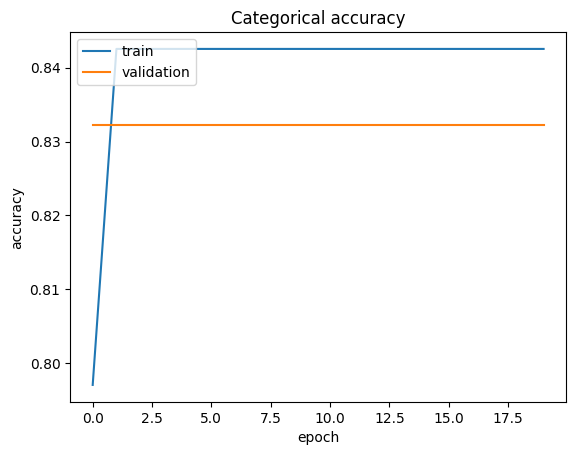

In [84]:
def plot_hist(hist):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Categorical accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_hist(history)

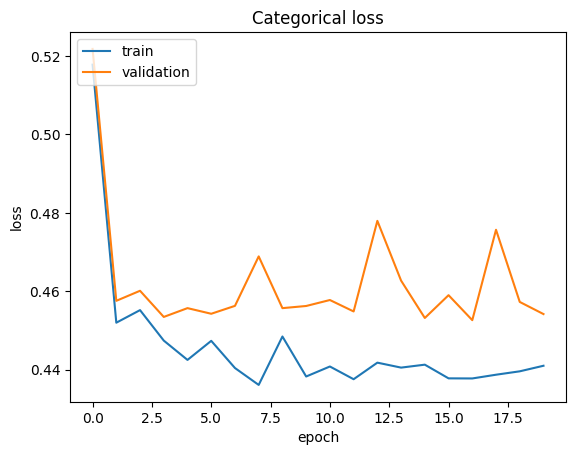

In [50]:
def plot_hist(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Categorical loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

plot_hist(history)

In [74]:
def predict_signature(image_path, model):
    """Predicts whether a signature is real or forged.

    Args:
        image_path: The path to the image file.
        model: The trained signature verification model.

    Returns:
        A string indicating whether the signature is real or forged.
    """

    # Load and preprocess the image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Show image
    plt.imshow(img, cmap='gray')
    plt.title('Signature Image')
    plt.axis('off')
    plt.show()

    # Resize, reshape and normalize the input image
    img = cv2.resize(img, (224, 224))
    img = np.array(img).reshape(1, 224, 224, 1) / 255.0

    # Predict the class of the signature image
    prediction = model.predict(img)
    print(prediction)

    # Determine the prediction label
    if prediction < 0.5:
        return "The signature is real."
    else:
        return "The signature is forged."


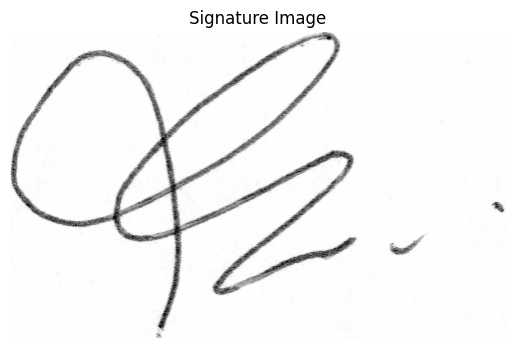

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[[0.08654968]]
The signature is real.


In [75]:
image_path = path + '/sign_data/test/049_forg/01_0114049.PNG'

prediction_result = predict_signature(image_path, model)
print(prediction_result)